In [3]:
#Create Environment
import pandas as pd
import numpy as np
import palettable
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "arial" # if you don't have arial it will fall back to Deja Vu
plt.rcParams["font.size"] = "18"

import matplotlib

!pip install comut
from comut import comut
from comut import fileparsers
from matplotlib import rcParams
custom_rcParams = {'font.family': 'Times New Roman',
                   'font.size': 16}

# update rcParams
rcParams.update(custom_rcParams)

In [4]:
#import data sets
mutations_rev_df = pd.read_csv('~/CD38_Project/PDOT_data/New_Files/CD38_Mutations_Rev.tsv', sep = '\t')
TMB_rev_df = pd.read_csv('~/CD38_Project/PDOT_data/New_Files/CD38_TMB_rev.tsv', sep = '\t')

#import PDOTS data
aPD1_rev_df = pd.read_csv('~/CD38_Project/PDOT_data/New_Files/CD38_aPD1_rev.tsv', sep = '\t')
aCD38_rev_df = pd.read_csv('~/CD38_Project/PDOT_data/New_Files/CD38_aCD38_rev.tsv', sep = '\t')
aPD1_aCD38_rev_df = pd.read_csv('~/CD38_Project/PDOT_data/New_Files/CD38_aPD1_aCD38_rev.tsv', sep = '\t')

age_rev_df = pd.read_csv('~/CD38_Project/PDOT_data/New_Files/CD38_Age_rev.tsv', sep = '\t')
gender_rev_df = pd.read_csv('~/CD38_Project/PDOT_data/New_Files/CD38_Gender_rev.tsv', sep = '\t')
clinical_rev_df = pd.read_csv('~/CD38_Project/PDOT_data/New_Files/CD38_Clinical_rev.tsv', sep = '\t')
location_rev_df = pd.read_csv('~/CD38_Project/PDOT_data/New_Files/CD38_Location_rev.tsv', sep = '\t')
tumortype_rev_df = pd.read_csv('~/CD38_Project/PDOT_data/New_Files/CD38_Tumor_Type_rev.tsv', sep = '\t')


In [5]:
#define colors
locationcolors = {'Primary':'tab:olive', 'Lymph Node':'#48BF91', 'Metastasis':'#11694E'}
typecolors = {'Cutaneous Melanoma': 'black', 'Mucosal Melanoma':'dimgray', 
             'Merkel Cell Carcinoma':'blue', 'Colon Cancer':'cyan',
             'Cholangiocarcinoma':'steelblue'}
clinicalcolors = {'Treatment naive/unknown':'lightgray', 'Non-responder':'purple',
                  'Mixed Responder':'slateblue', 'Responder':'cadetblue'}
TMB_colors = {'High':'maroon', 'Low':'orchid', 'Unknown':'lightgray'}
age_colors = {'Absent':'gray', '<40 years':'#86DFF3', '40-60 years':'#0675B0','>60 years':'#082160'}
mutation_colors = {'Absent': 'lightgrey', 'Unknown/normal':'lightgrey', 'Mutated':'black'}
gender_colors = {'Male':'Black', 'Female':'dimgrey'}

#define order
Response_order = ['aCD38+aPD-1', 'aCD38', 'aPD-1']

In [6]:
#Define CoMut
Mutation_Con_Rev = comut.CoMut()

mutation_order = ['APC', 'BRCA1', 'BRCA2', 'BRAF (V600E)', 'CDKN2A', 'EGFR', 'GNAS', 
                  'MYC', 'NRAS', 'PTEN', 'TERT', 'TP53', 'TP63', 'ALK', 'ATM', 'ATRX',
                  'AURKA', 'BRAF', 'CCND3', 'CDK4', 'CIC', 'DAXX', 'DDX3X', 'EPHA7', 'ERBB3',
                  'ERBB4', 'FBXW7', 'FGFR2','FLT3', 'GLI1', 'INSR', 'IRS2','JAK2', 'KIT',
                  'KRAS', 'MAP2K1', 'MEN1', 'MET', 'MPL', 'MYCN', 'NF1', 'NOTCH1', 
                  'PDGFRA', 'PTCH1', 'PTPN11', 'PTPRS', 'RB1', 'RET', 'RHOA', 'RNF43', 'SK11'
                  , 'SMARCB1', 'SMO', 'STAG2', 'SUFU', 'TERC', 'TSC2', 'MAPK3K1', 'CKIT']
#Build the plot
Mutation_Con_Rev.add_categorical_data(mutations_rev_df, name = 'Mutation Status', 
                                mapping = mutation_colors, category_order = mutation_order)
Mutation_Con_Rev.add_categorical_data(clinical_rev_df, name = 'Clinical Response', mapping = clinicalcolors)
Mutation_Con_Rev.add_categorical_data(location_rev_df, name = 'Location', mapping = locationcolors)
Mutation_Con_Rev.add_categorical_data(tumortype_rev_df, name = 'Tumor Type', mapping = typecolors)
Mutation_Con_Rev.add_categorical_data(TMB_rev_df, name = 'TMB', mapping = TMB_colors)
Mutation_Con_Rev.add_categorical_data(age_rev_df, name = 'Age', mapping = age_colors)
Mutation_Con_Rev.add_categorical_data(gender_rev_df, name = 'Gender', mapping = gender_colors)

#add continuous
Mutation_Con_Rev.add_continuous_data(aPD1_rev_df, name = 'aPD-1', mapping = 'RdYlGn_r', value_range = (-65,100))
Mutation_Con_Rev.add_continuous_data(aCD38_rev_df, name = 'aCD38', mapping = 'RdYlGn_r', value_range = (-65,100))
Mutation_Con_Rev.add_continuous_data(aPD1_aCD38_rev_df, name = 'aPD-1+aCD38', mapping = 'RdYlGn_r', value_range = (-55,100))

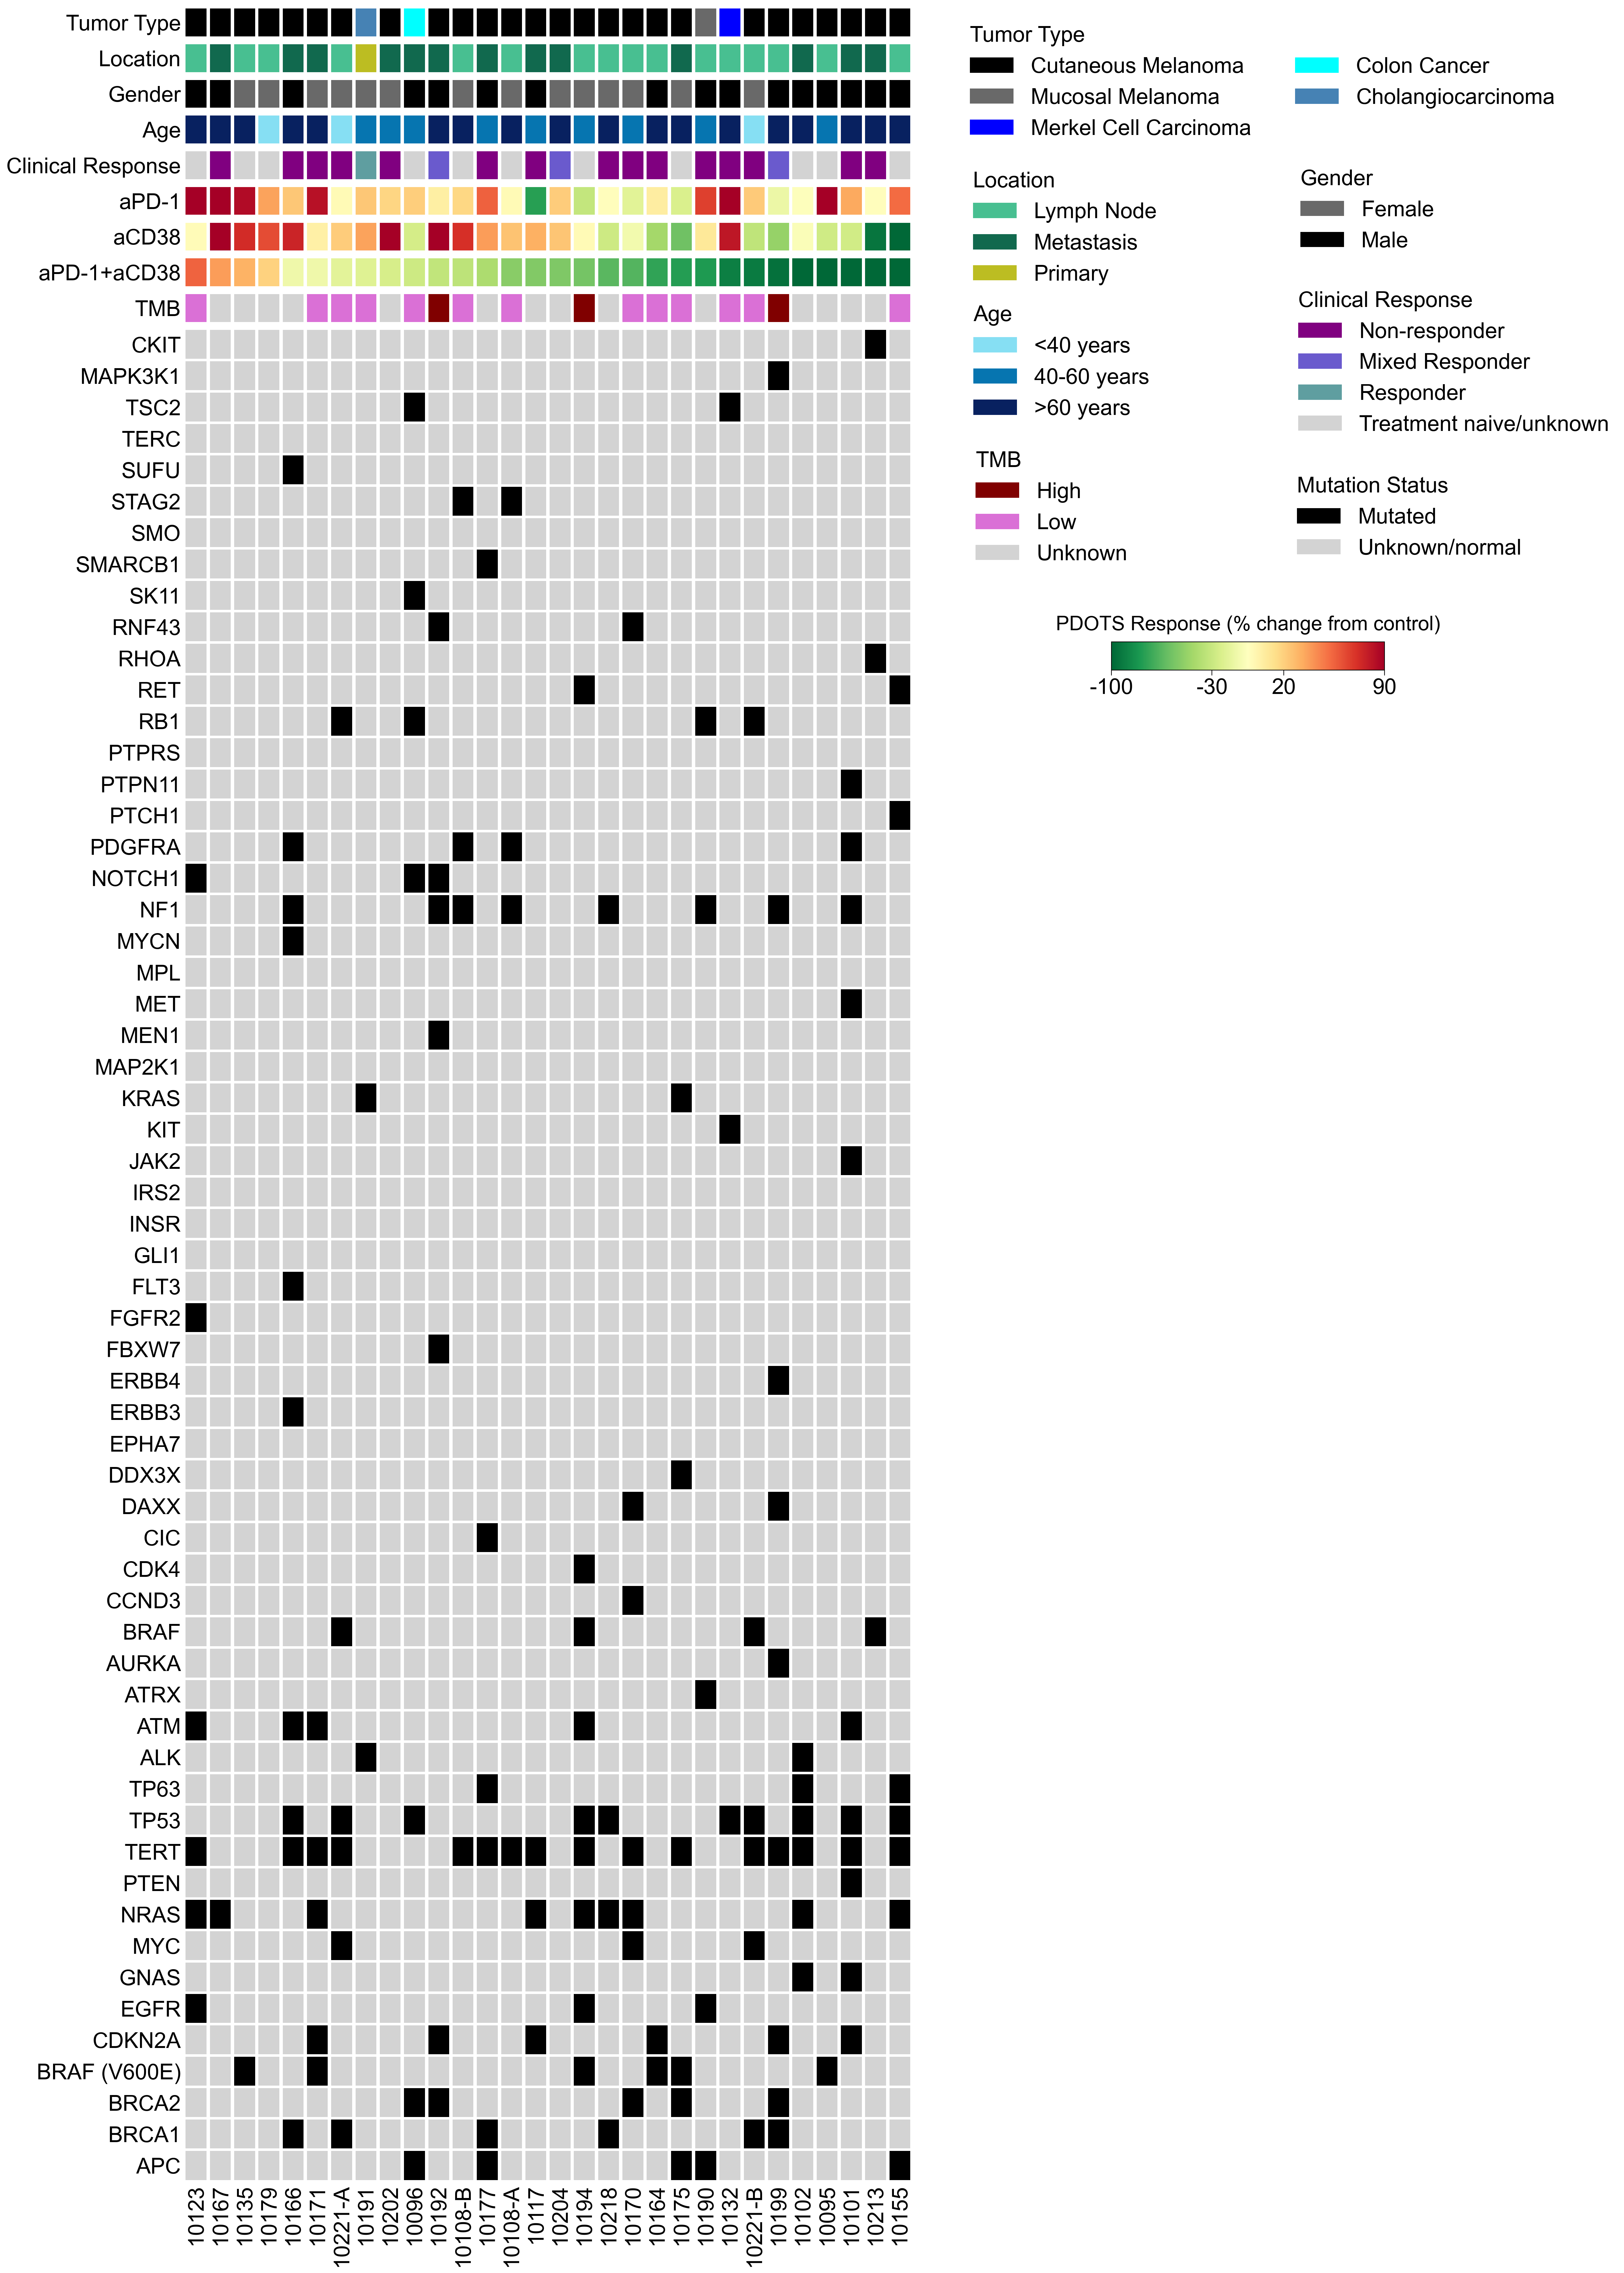

In [51]:
#PLOT
structure_rev = [['Mutation Status'],['TMB'],['aPD-1+aCD38'],['aCD38'],['aPD-1'],['Clinical Response'],['Age'],['Gender'],['Location'],['Tumor Type']]

Mutation_Con_Rev.plot_comut(figsize = (15, 45), x_padding = 0.07, y_padding = 0.04, hspace = 0.02, structure = structure_rev)

# update font back to arial
custom_rcParams = {'font.family': 'arial', 'font.size': 25}
rcParams.update(custom_rcParams)

#DETAILED LEGEND

#Edit legend order
tumor_order = ['Cutaneous Melanoma', 'Mucosal Melanoma',
               'Merkel Cell Carcinoma','Colon Cancer','Cholangiocarcinoma']
clinical_order = ['Non-responder','Mixed Responder','Responder', 'Treatment naive/Unknown']
TMB_order = ['High', 'Low', 'Unknown']
Age_order = ['<40 years', '40-60 years','>60 years']
Gender_order = ['Female','Male']

#Build legend
tumor_leg =Mutation_Con_Rev.add_axis_legend(name = 'Tumor Type', bbox_to_anchor = (1.05, 1), 
                                          title = 'Tumor Type', order = tumor_order, ncol = 2)
location_leg = Mutation_Con_Rev.add_axis_legend(name = 'Location', bbox_to_anchor = (1.36, -2.5), 
                                        title = 'Location', ncol = 1)
clinical_leg = Mutation_Con_Rev.add_axis_legend(name = 'Clinical Response', bbox_to_anchor = (1.98, -2.9), 
                                        title = 'Clinical Response', order = clinical_order, ncol = 1)
TMB_leg = Mutation_Con_Rev.add_axis_legend(name = 'TMB', bbox_to_anchor = (1.32, -3.45), 
                                        title = 'TMB', order = TMB_order, ncol = 1)
Age_leg = Mutation_Con_Rev.add_axis_legend(name = 'Age', bbox_to_anchor = (1.35, -4.49), 
                                        title = 'Age', order = Age_order, ncol = 1)
Gender_leg = Mutation_Con_Rev.add_axis_legend(name = 'Gender', bbox_to_anchor = (1.74, -1.3), 
                                        title = 'Gender', order= Gender_order, ncol = 1)
Mutation_leg = Mutation_Con_Rev.add_axis_legend(name = 'Mutation Status', bbox_to_anchor = (1.86, 0.93), 
                                        title = 'Mutation Status', ncol = 1)


# color bars must be added manually based on figure coordinates - [left, bottom, width, height]
purity_ax = Mutation_Con_Rev.figure.add_axes([1.11, 0.645, 0.29, 0.01])

# create range
norm = matplotlib.colors.Normalize(vmin=-100, vmax=90)

# create the colorbar with colormap used
resp_colorbar = Mutation_Con_Rev.figure.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap='RdYlGn_r'),
                                                 cax=purity_ax, orientation='horizontal')

# remove tick marks and move tick labels slightly inwards. Also remove black border
resp_colorbar.ax.tick_params(size=6)
resp_colorbar.set_ticks([-100,-30,20,90])
resp_colorbar.set_ticklabels([-100,-30,20,90])
resp_colorbar.outline.set_visible(True)

# set title of colorbar to line up with other legend elements
resp_colorbar.set_label('PDOTS Response (% change from control)', labelpad = -95, x = 0.5, fontsize = 23)
